In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv('US-pumpkins.csv')
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [100]:
df.describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
df.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [102]:
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
new_columns = ['Color','Origin','Item Size','Variety','City Name','Package', 'Date', 'Low Price', 'High Price', 'Most Low', 'Repack']
all_pumpkins = df.drop([c for c in df.columns if c not in new_columns], axis=1)
all_pumpkins.dropna(inplace=True)
new_pumpkins = all_pumpkins.apply(LabelEncoder().fit_transform)

In [104]:
Selected_features = ['Origin','Item Size','Variety','City Name','Package']
X= new_pumpkins[Selected_features]
y = new_pumpkins['Color']

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [118]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
predictions = lr_classifier.predict(X_test)

print(classification_report(y_test, predictions))
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       166
           1       0.00      0.00      0.00        33

    accuracy                           0.81       199
   macro avg       0.42      0.49      0.45       199
weighted avg       0.69      0.81      0.75       199

Accuracy:  0.8140703517587939


In [119]:
lr_pred=lr_classifier.predict(X_test)
lr_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0])

In [120]:
def display_confusion_matrix(test,pred,model_name =''):
    confmatrix= confusion_matrix(test, pred)
    ax = plt.subplot()
    sns.heatmap(confmatrix, annot=True, ax=ax, cbar=False)
    plt.title('Confusion Matrix for '+str(model_name) + '\n')
    ax.set_xlabel('Ground Truth')
    ax.set_ylabel('Predicted')
    ax.xaxis.set_ticklabels(['0','1'])
    ax.yaxis.set_ticklabels(['0','1'])
    plt.show()

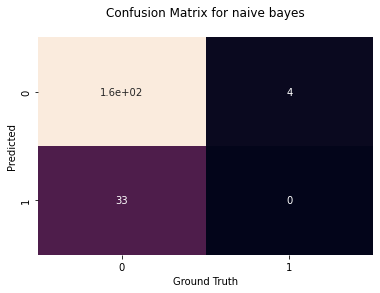

In [121]:
display_confusion_matrix(y_test,lr_pred, 'naive bayes')

<AxesSubplot:>

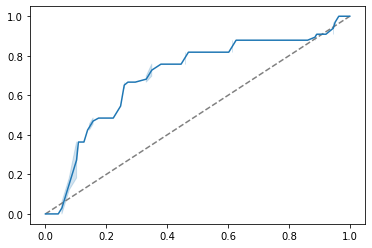

In [122]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = lr_classifier.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1], color='gray', linestyle='--')
sns.lineplot(fpr, tpr)

In [123]:
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.6976998904709748
